# NLP - LAB 4

# **SPAM EMAIL CLASSIFICATION**

# Load and Explore Dataset

In [4]:
# Step 1: Load Dataset

import pandas as pd

df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df = df.iloc[:, :2] #First two columns (label and message)
df.columns = ["label", "message"]

print("Dataset Sample:")
print(df.head())

Dataset Sample:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# Text Preprocessing

In [5]:
# Preprocess Data

import re
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords

def preprocess_text(text):
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and Convert to lowercase
    tokens = nltk.word_tokenize(text.lower())
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(filtered_tokens)

df['cleaned_message'] = df['message'].apply(preprocess_text)

# Convert labels to binary (1 for spam, 0 for ham)
df['label'] = df['label'].map({'spam':1, 'ham':0})



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Split Data

In [6]:
# Step 3: Split Data

from sklearn.model_selection import train_test_split

print(df.columns)

X = df['cleaned_message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Index(['label', 'message', 'cleaned_message'], dtype='object')


# Feature Engineering

In [7]:
# Step 4: Feature Engineering with BoW

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10000, ngram_range=(1, 1), stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Model Training

***NAIVE BAYES***

In [8]:
# Step 5: Train Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()  # Initialize the NB Model
model.fit(X_train, y_train)  # Train the Model

MultinomialNB()

In [9]:
# Step 6: Make Predictions

y_pred = model.predict(X_test)

In [10]:
# Step 7: Evaluate the Model

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report NAIVE BAYES:\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Accuracy: 0.9784688995215312

Classification Report NAIVE BAYES:
               precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      1453
        Spam       0.93      0.90      0.92       219

    accuracy                           0.98      1672
   macro avg       0.96      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672



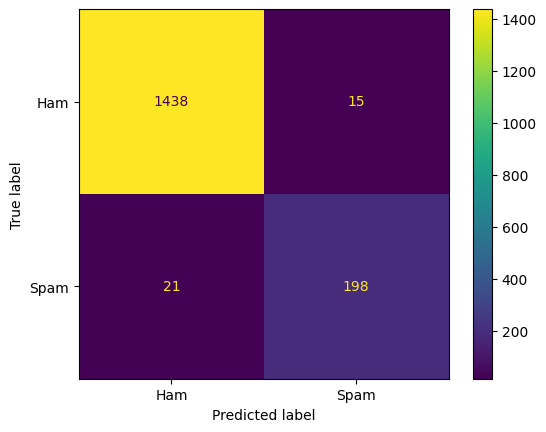

In [11]:
# Step 8: Produce Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='viridis')

***SVM***

In [15]:
# Train SVM Classifier

from sklearn.svm import SVC

# Initialize the SBM Model
# Linear Kernel is commonly used for text classification

model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)  # Train the model

SVC(kernel='linear')

In [16]:
# Make Predictions

y_pred = model.predict(X_test)

In [17]:
# Evaluate the Model

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report SVM:\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Accuracy: 0.9754784688995215

Classification Report SVM:
               precision    recall  f1-score   support

         Ham       0.98      1.00      0.99      1453
        Spam       0.98      0.83      0.90       219

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



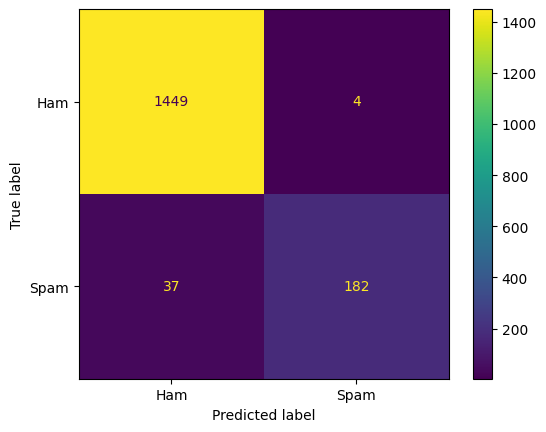

In [18]:
# Produce Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='viridis')

***LOGISTIC REGRESSION***

In [19]:
# Train Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression Model
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)  # Train the model

LogisticRegression(max_iter=1000)

In [20]:
# Make Predictions

y_pred = model.predict(X_test)

In [21]:
# Evaluate the Model

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report LOGISTIC REGRESSION:\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Accuracy: 0.9754784688995215

Classification Report LOGISTIC REGRESSION:
               precision    recall  f1-score   support

         Ham       0.97      1.00      0.99      1453
        Spam       0.99      0.82      0.90       219

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



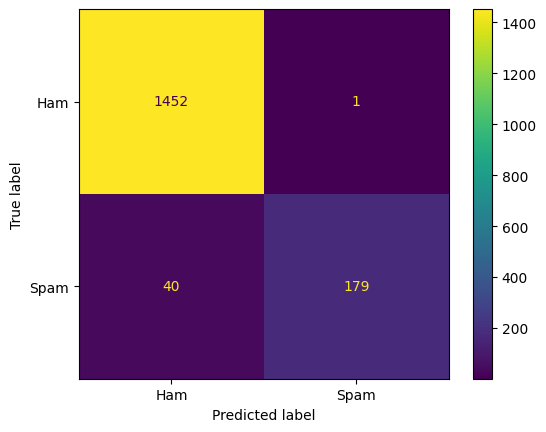

In [22]:
# Produce Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='viridis')

***RANDOM FOREST***

In [23]:
# Train Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Train the model

RandomForestClassifier(random_state=42)

In [24]:
# Make Predictions

y_pred = model.predict(X_test)

In [25]:
# Evaluate the Model

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report RANDOM FOREST:\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Accuracy: 0.9712918660287081

Classification Report RANDOM FOREST:
               precision    recall  f1-score   support

         Ham       0.97      1.00      0.98      1453
        Spam       0.99      0.79      0.88       219

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



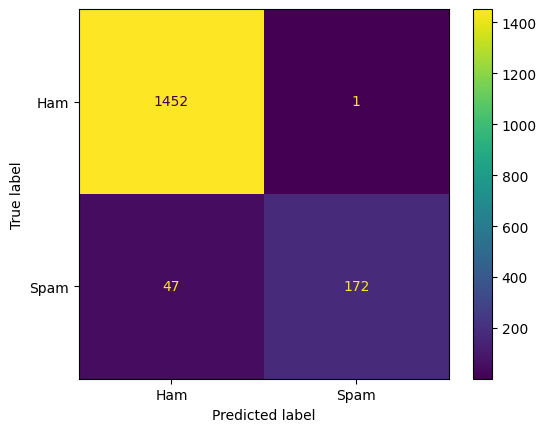

In [26]:
# Produce Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='viridis')

# **NEWS ARTICLE CLASSIFICATION**

# Load Dataset

In [49]:
# Required imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
import nltk
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [53]:
import nltk
nltk.data.find('tokenizers/punkt')

FileSystemPathPointer('/root/nltk_data/tokenizers/punkt')

In [55]:
# Step 1: Load News Dataset

from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'sci.space', 'comp.graphics', 'rec.sport.hockey']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

# Preprocessing

In [56]:
# Preprocess news data
X = [preprocess_text(text) for text in newsgroups.data]
y = newsgroups.target


# Split Data

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Feature Engineering

In [ ]:
# Feature engineering using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model Training

In [57]:
# Train SVM model
svm_news = LinearSVC(random_state=42)
svm_news.fit(X_train_tfidf, y_train)

# Evaluate base model
y_pred_news = svm_news.predict(X_test_tfidf)
base_accuracy = accuracy_score(y_test, y_pred_news)
base_report = classification_report(y_test, y_pred_news)

# Alternative model (Random Forest)
rf_news = RandomForestClassifier(n_estimators=100, random_state=42)
rf_news.fit(X_train_tfidf, y_train)
y_pred_rf = rf_news.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)


# Model Testing

In [58]:
# Print news classification results
print("\nNews Article Classification Results:")

# Base model results
print("\nBase SVM Model:")
print(f"Accuracy: {base_accuracy:.4f}")
print("Classification Report:")
print(base_report)

# Enhanced model results
print("\nEnhanced SVM Model:")
print(f"Accuracy: {enhanced_accuracy:.4f}")
print("Classification Report:")
print(enhanced_report)

# Random Forest results
print("\nRandom Forest Model:")
print(f"Accuracy: {rf_accuracy:.4f}")
print("Classification Report:")
print(rf_report)


News Article Classification Results:

Base SVM Model:
Accuracy: 0.9761
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       229
           1       0.94      1.00      0.97       305
           2       1.00      0.98      0.99       287
           3       0.99      0.95      0.97       307

    accuracy                           0.98      1128
   macro avg       0.98      0.98      0.98      1128
weighted avg       0.98      0.98      0.98      1128


Enhanced SVM Model:
Accuracy: 0.9761
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       229
           1       0.94      1.00      0.97       305
           2       1.00      0.98      0.99       287
           3       0.99      0.95      0.97       307

    accuracy                           0.98      1128
   macro avg       0.98      0.98      0.98      1128
weighted avg       0.98      

# ENHANCED MODEL

In [59]:
# Enhanced preprocessing function
def enhanced_preprocess(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

# Enhanced TF-IDF vectorizer
enhanced_tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 3),  # Include unigrams, bigrams, and trigrams
    min_df=2,  # Ignore terms that appear in less than 2 documents
    max_df=0.95  # Ignore terms that appear in more than 95% of the documents
)

# Enhanced SVM with parameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1.0, 10.0],  # Regularization strength
    'class_weight': ['balanced', None],  # Handle class imbalance
}

# Initialize GridSearchCV for the enhanced SVM model
svm_grid = GridSearchCV(
    LinearSVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

# Apply enhanced preprocessing to news data
X_train_enhanced = [enhanced_preprocess(text) for text in X_train]
X_test_enhanced = [enhanced_preprocess(text) for text in X_test]

# Transform the data using the enhanced TF-IDF vectorizer
X_train_enhanced_tfidf = enhanced_tfidf.fit_transform(X_train_enhanced)
X_test_enhanced_tfidf = enhanced_tfidf.transform(X_test_enhanced)

# Fit the enhanced SVM model with GridSearchCV
svm_grid.fit(X_train_enhanced_tfidf, y_train)

# Display the best parameters from GridSearchCV
print("Best parameters found by GridSearchCV:")
print(svm_grid.best_params_)

# Evaluate the enhanced model on the test data
y_pred_enhanced = svm_grid.predict(X_test_enhanced_tfidf)
enhanced_accuracy = accuracy_score(y_test, y_pred_enhanced)
enhanced_report = classification_report(y_test, y_pred_enhanced)

# Display the enhanced model's performance
print("\nEnhanced SVM Model Performance:")
print(f"Accuracy: {enhanced_accuracy:.4f}")
print("Classification Report:")
print(enhanced_report)

Best parameters found by GridSearchCV:
{'C': 1.0, 'class_weight': None}

Enhanced SVM Model Performance:
Accuracy: 0.9761
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.94      0.99      0.97       305
           2       1.00      0.98      0.99       287
           3       0.99      0.94      0.97       307

    accuracy                           0.98      1128
   macro avg       0.98      0.98      0.98      1128
weighted avg       0.98      0.98      0.98      1128



In [60]:
# Transform the enhanced training data using TF-IDF
X_train_enhanced_tfidf = enhanced_tfidf.fit_transform(X_train_enhanced)
# Transform the enhanced testing data using TF-IDF
X_test_enhanced_tfidf = enhanced_tfidf.transform(X_test_enhanced)

rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the RandomForestClassifier with the transformed data
rf_classifier.fit(X_train_enhanced_tfidf, y_train)

# Predict using the transformed data
rf_predictions = rf_classifier.predict(X_test_enhanced_tfidf)


In [61]:
# Import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Print the accuracy
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}")

Random Forest Model Accuracy: 0.9495


# Model Evaluation

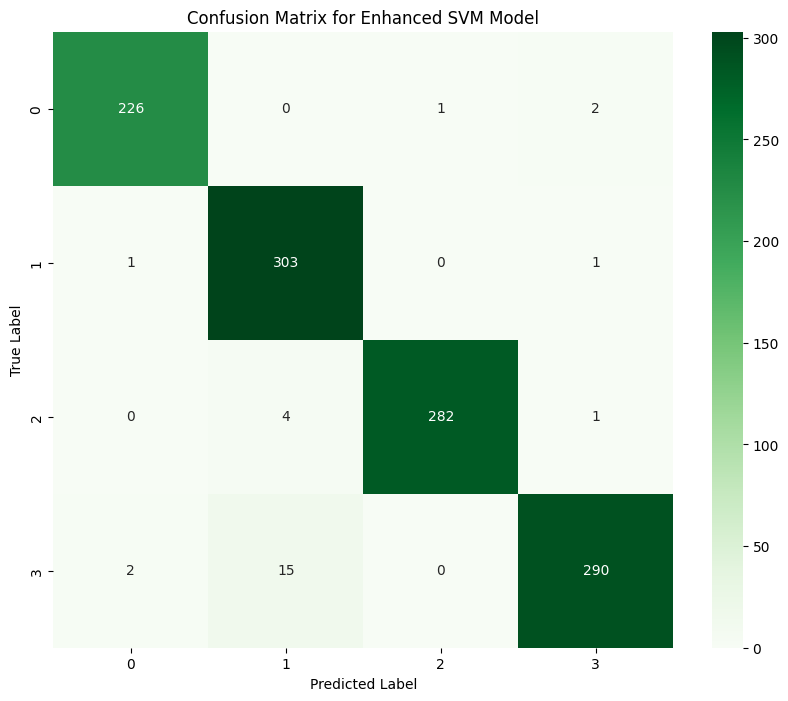

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.94      0.99      0.97       305
           2       1.00      0.98      0.99       287
           3       0.99      0.94      0.97       307

    accuracy                           0.98      1128
   macro avg       0.98      0.98      0.98      1128
weighted avg       0.98      0.98      0.98      1128



In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, svm_grid.predict(X_test_enhanced_tfidf)) # Changed X_test_enhanced to X_test_enhanced_tfidf
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Enhanced SVM Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Classification Report:")
print(classification_report(y_test, svm_grid.predict(X_test_enhanced_tfidf))) # Changed X_test_enhanced to X_test_enhanced_tfidf